# Assignment 3: Building Time Series Forecasts

**Student Name:** [Madison Zorman]

**Date:** [2/15/26]

---

## Assignment Overview

In this assignment, you'll analyze temporal data from Corporación Favorita stores to identify trends, seasonality, and anomalies, then build forecasting models using decomposition techniques. You'll work with real retail sales data to predict future sales patterns.

---

## Step 1: Download Data, Import Libraries, and Load Data

The datasets for this analysis are too large too be stored on GitHub. To access the datasets for this assignment, you should:
- Go to the [Store Sales - Time Series Forecasting](https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data) dataset on Kaggle.
- Click Data 
- Scroll down and select **Download All**.
- Open the zip file and upload `train.csv`, `store.csv`, and `holidays_events.csv` to the `data` directory.

Once the CSV files have been added to the `data` directory, install all the of the necessary libraries for this assignment by running the command below.

In [9]:
pip install pandas numpy matplotlib seaborn scikit-learn statsmodels

Note: you may need to restart the kernel to use updated packages.


Next, import the required libraries.

In [10]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# For time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


Finally, load the training, store, and holiday CSV data from the `data` directory using `pd.read_csv()`. Display basic information about the training data and print out the first few rows to get an understanding of what the training data looks like.

In [11]:
# Load the datasets
# TODO: Load all three required CSV files
train_df = pd.read_csv('train.csv')  # Replace with pd.read_csv('data/train.csv')
holidays_df = pd.read_csv("holidays_events.csv")  # Replace with pd.read_csv('data/holidays_events.csv')
stores_df = pd.read_csv('stores.csv')   # Replace with pd.read_csv('data/stores.csv')

# Display basic information
if train_df is not None:
    print(f"Training data shape: {train_df.shape}")
    print(f"Date range: {train_df['date'].min()} to {train_df['date'].max()}")
    print(f"\nFirst few rows:")
    # TODO: Display the first few rows
    print(train_df.head(15))


    

print("\n" + "="*80)
print("CHECKPOINT: Verify datasets loaded correctly")
print(f"Train data shape: {train_df.shape if train_df is not None else 'Not loaded'}")
print(f"Holidays data shape: {holidays_df.shape if holidays_df is not None else 'Not loaded'}")
print(f"Stores data shape: {stores_df.shape if stores_df is not None else 'Not loaded'}")
print("="*80)

Training data shape: (3000888, 6)
Date range: 2013-01-01 to 2017-08-15

First few rows:
    id        date  store_nbr        family  sales  onpromotion
0    0  2013-01-01          1    AUTOMOTIVE    0.0            0
1    1  2013-01-01          1     BABY CARE    0.0            0
2    2  2013-01-01          1        BEAUTY    0.0            0
3    3  2013-01-01          1     BEVERAGES    0.0            0
4    4  2013-01-01          1         BOOKS    0.0            0
5    5  2013-01-01          1  BREAD/BAKERY    0.0            0
6    6  2013-01-01          1   CELEBRATION    0.0            0
7    7  2013-01-01          1      CLEANING    0.0            0
8    8  2013-01-01          1         DAIRY    0.0            0
9    9  2013-01-01          1          DELI    0.0            0
10  10  2013-01-01          1          EGGS    0.0            0
11  11  2013-01-01          1  FROZEN FOODS    0.0            0
12  12  2013-01-01          1     GROCERY I    0.0            0
13  13  2013-01-

### Explore Available Stores and Product Families
Display store information from `stores_df` to help choose a store. Consider looking at store type, cluster, and city

In [12]:
# Explore the data to help choose your store and products
if train_df is not None:
    print("Available stores:")
    print(f"Total number of stores: {train_df['store_nbr'].nunique()}")
    
    print("\nAvailable product families:")
    families = train_df['family'].value_counts().head(20)
    print(families)
    
    # TODO: Display store information from stores_df to help choose a store
    # Consider looking at store type, cluster, and city
    print(stores_df.iloc[25])
    




Available stores:
Total number of stores: 54

Available product families:
family
AUTOMOTIVE             90936
BABY CARE              90936
BEAUTY                 90936
BEVERAGES              90936
BOOKS                  90936
BREAD/BAKERY           90936
CELEBRATION            90936
CLEANING               90936
DAIRY                  90936
DELI                   90936
EGGS                   90936
FROZEN FOODS           90936
GROCERY I              90936
GROCERY II             90936
HARDWARE               90936
HOME AND KITCHEN I     90936
HOME AND KITCHEN II    90936
HOME APPLIANCES        90936
HOME CARE              90936
LADIESWEAR             90936
Name: count, dtype: int64
store_nbr           26
city         Guayaquil
state           Guayas
type                 D
cluster             10
Name: 25, dtype: object


---
## Step 2: Select and Prepare Your Time Series Data

### Select Your Store and Product Families

Choose one store and one product family (PRODUCE, BEVERAGES, BREAD/BAKERY, AUTOMOTIVE, etc.) to analyze.

In [13]:
# TODO: Select your store and product family
selected_store = 15  # Replace with your chosen store number (e.g., 1)
product_family_1 = 'EGGS'  # Replace with the product family you selected (e.g., 'PRODUCE')

print(f"Selected Store: {selected_store}")
print(f"Product Family 1: {product_family_1}")

Selected Store: 15
Product Family 1: EGGS


### Filter Data
Filter the `train_df` data to your selected store and products. Create a date range from 2016-01-01 to 2017-08-15 for consistency.

In [14]:
# TODO: Filter train_df for selected store and date range 2016-01-01 to 2017-08-15

# Convert date column to datetime if needed
if train_df is not None:
    train_df['date'] = pd.to_datetime(train_df['date'])

# Filter for date range
start_date = '2016-01-01'
end_date = '2017-08-15'

# TODO: Create filtered datasets for each product family
product1_data = train_df[
    (train_df['store_nbr'] == selected_store) &
    (train_df['family'] == product_family_1) &
    (train_df['date'] >= start_date) & (train_df['date'] <= end_date)
] # Filter for store, product_family_1, and date range

print("\n" + "="*80)
print("CHECKPOINT: Data filtered successfully")
print(f"Product data shape: {product1_data.shape if product1_data is not None else 'Not filtered'}")
print("="*80)


CHECKPOINT: Data filtered successfully
Product data shape: (592, 6)


### Aggregate Daily Sales
Aggregate daily sales and handle missing dates.

In [15]:
# TODO: Group by date and sum sales for each product family
# TODO: Create a complete date range and fill missing dates with 0 sales

# Example structure (replace with your implementation):
date_range = pd.date_range(start=start_date, end=end_date, freq='D')
# product1_ts = product1_data.groupby('date')['sales'].sum().reindex(date_range, fill_value=0)

product1_ts = product1_data.groupby('date')['sales'].sum().reindex(date_range, fill_value=0)

### Plot Raw Time Series
Plot time series to see the raw patterns using matplotlib.

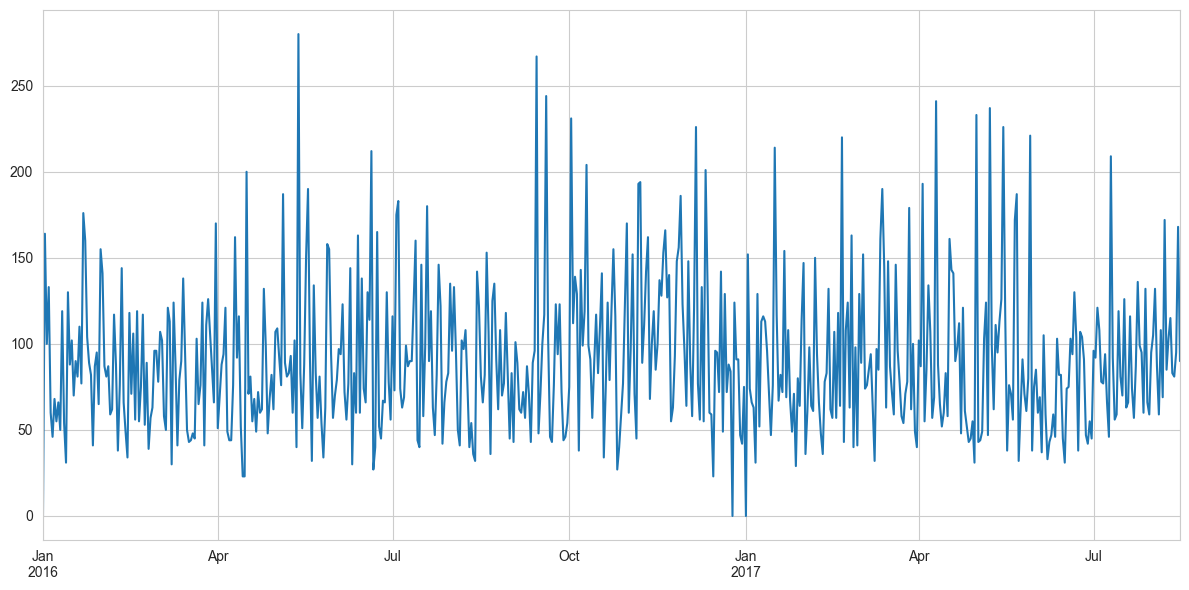

In [16]:
# Plot Product 1
# TODO: Plot product1_ts on a line chart as a time series

product1_ts.plot.line()
plt.tight_layout()
plt.show()

### Document Your Choice (2-3 sentences)
Explain why you chose this product. 
- What contrasts do they represent? 
- Why will they be interesting to compare?

I choose eggs because they are a household necessity that many people use daily. The contrasts in the data represent the days with high sales and the days with low sales.

---
## Step 3: Identify Trends Using Moving Averages

### Calculate Moving Averages
Calculate the 7-day and 30-day moving averages for the product you are analyzing.

In [17]:
# TODO: Calculate 7-day and 30-day moving averages for your product

# For Product 1
product1_ma7 = product1_ts.rolling(window=7).mean()  # Replace with product1_ts.rolling(window=7).mean()
product1_ma30 = product1_ts.rolling(window=30 ).mean()  # Replace with product1_ts.rolling(window=30).mean()

print('7-day moving average:')
print(product1_ma7.head(10))

print('30-day moving average:')
print(product1_ma30.head(10))


7-day moving average:
2016-01-01          NaN
2016-01-02          NaN
2016-01-03          NaN
2016-01-04          NaN
2016-01-05          NaN
2016-01-06          NaN
2016-01-07    81.571429
2016-01-08    89.428571
2016-01-09    75.428571
2016-01-10    68.285714
Freq: D, Name: sales, dtype: float64
30-day moving average:
2016-01-01   NaN
2016-01-02   NaN
2016-01-03   NaN
2016-01-04   NaN
2016-01-05   NaN
2016-01-06   NaN
2016-01-07   NaN
2016-01-08   NaN
2016-01-09   NaN
2016-01-10   NaN
Freq: D, Name: sales, dtype: float64


### Plot Original Sales
Using matplotlip, plot original sales with both moving averages (7-day and 30-day) overlaid.

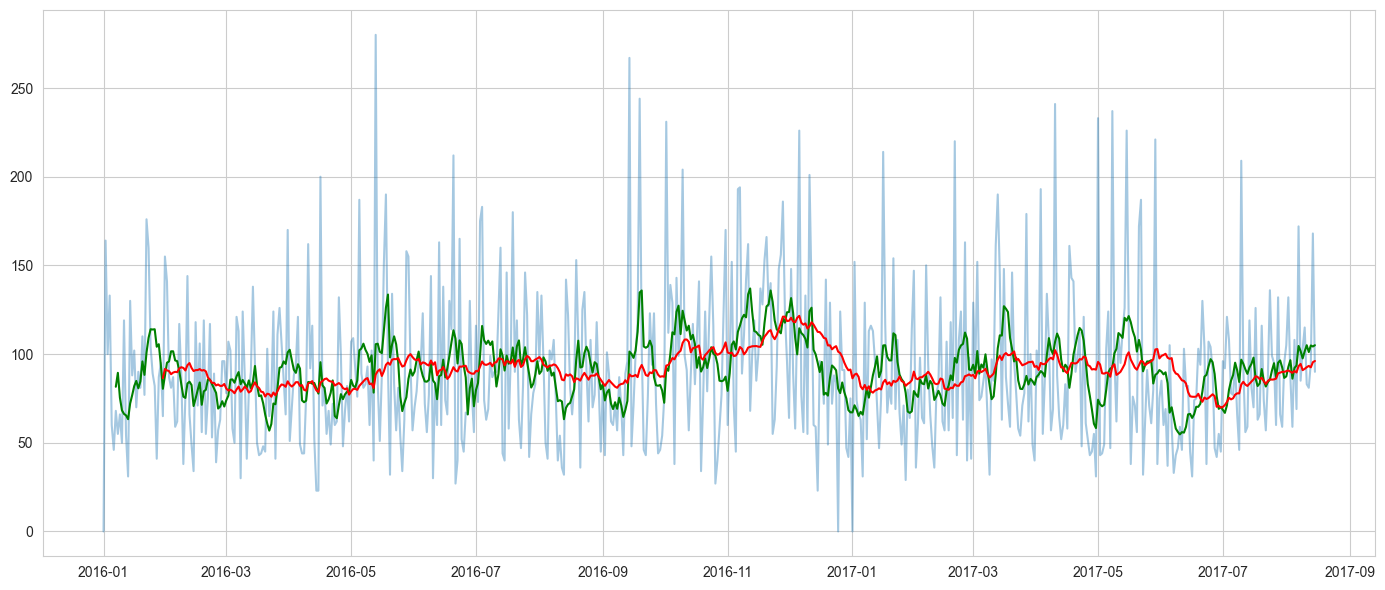

In [18]:
# Plot original sales with moving averages
fig, axes = plt.subplots(1, 1, figsize=(14, 6))

# Product 1
# TODO: Plot original, 7-day MA, and 30-day MA for product 1
axes.plot(product1_ts.index, product1_ts.values, alpha=0.4, label='Daily Sales')
axes.plot(product1_ma7.index, product1_ma7.values, label='7-Day MA', color='green')
axes.plot(product1_ma30.index, product1_ma30.values, label='30-Day MA',color='red')


plt.tight_layout()
plt.show()

### Identify and Explain Trend Changes

Merge the data with `holidays_events.csv` to explain what caused these changes.

In [19]:
# Merge with holidays to explain trend changes
# TODO: Convert holidays_df date to datetime and filter for your date range


if holidays_df is not None:
    holidays_df['date'] = pd.to_datetime(holidays_df['date'])
    relevant_holidays =  holidays_df.head(10).copy()
    relevant_holidays['day_name'] = relevant_holidays['date'].dt.day_name()
    relevant_holidays['weekday_num'] = relevant_holidays['date'].dt.weekday
    relevant_holidays['month'] = relevant_holidays['date'].dt.month # Filter holidays_df for your date range
    
    # TODO: Display holidays that might explain trend changes
    print("Key holidays/events in the period:")
    # Display relevant holidays
    print(relevant_holidays[['date', 'day_name', 'weekday_num', 'month']])


Key holidays/events in the period:
        date  day_name  weekday_num  month
0 2012-03-02    Friday            4      3
1 2012-04-01    Sunday            6      4
2 2012-04-12  Thursday            3      4
3 2012-04-14  Saturday            5      4
4 2012-04-21  Saturday            5      4
5 2012-05-12  Saturday            5      5
6 2012-06-23  Saturday            5      6
7 2012-06-25    Monday            0      6
8 2012-06-25    Monday            0      6
9 2012-06-25    Monday            0      6


### Document Trend Analysis
For the product family you are analyzing, document:
1. Overall trend direction (growing, declining, stable)
2. Any trend changes that correlate with holidays or events
3. Business implications of the trends you discovered

Update the markdown cell below with your analysis.

**Product Trends:**
- Overall trend direction: the overall trend direction seems to be pretty stable.
- Key trend changes: Changes in the data include two days in late December and early January with no sales at all, likely pertaining to Christmas Day and New Year's. Another change is a slight increase in egg sales between October and December, followed by a large dip in sales between December and January.
- Holiday correlations: from the data the store seems to be closed on christmas and new year due to there being no sales.
- Business implications: the store should keep a reletivly similar stock of eggs at all times.

---
## Step 4: Detect and Visualize Seasonal Patterns

Analyze the seasonal components of your sales data.

### Day-of-Week Analysis

Add day of week to your data and calculate the average sales by day. Create a bar plot to visualize the weekday patterns.

<Axes: xlabel='day_of_week'>

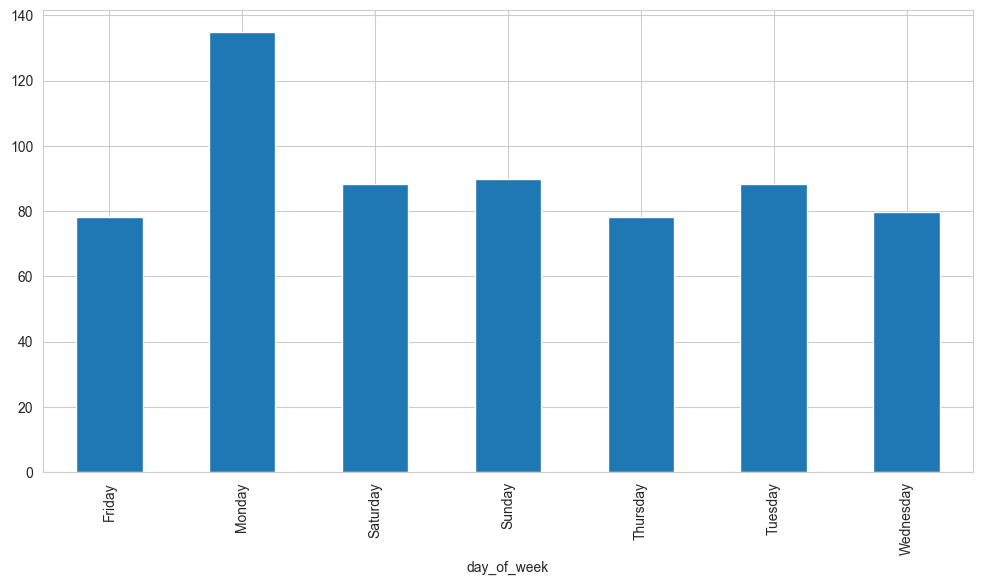

In [22]:
# Analyze day-of-week patterns
# TODO: Add day of week to your data and calculate average sales by day
 # Create DataFrame with date and sales
product1_dow=pd.DataFrame({'date': product1_ts.index, 'sales': product1_ts.values})  # Create DataFrame with date and sales

product1_dow['day_of_week'] = product1_dow['date'].dt.day_name()  # Add day of week to your data (replace with product1_ts.index.day_name())

# Group by day of week and calculate mean sales
avg_sales_by_day = product1_dow.groupby('day_of_week')['sales'].mean()

# Create bar plot comparing weekday patterns
# TODO: Create bar plot showing average sales by day of week
avg_sales_by_day.plot.bar()

### Monthly Seasonality Analysis

Calculate the average sales by month for both products. Once calculated, create a line plot showing monthly patterns for the product.

<Axes: xlabel='date'>

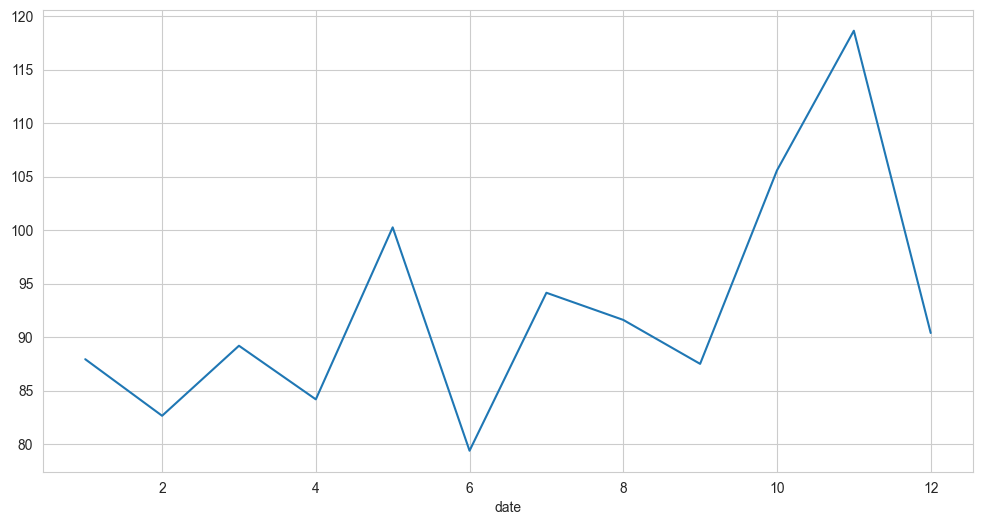

In [23]:
# Analyze monthly patterns
# TODO: Calculate average sales by month for the product.

# For Product 1
product1_monthly = product1_dow.groupby(product1_dow['date'].dt.month)['sales'].mean()


# Create visualization
# TODO: Create line plot showing monthly patterns for both products
product1_monthly.plot.line()

### Holiday Impact Analysis

Compare the average sales on holidays compared to regular days.

In [27]:
# Analyze holiday vs non-holiday sales
# TODO: Compare average sales on holidays vs regular days

# Create a list of holiday dates
holiday_dates = holidays_df['date'].unique()  # Extract unique dates from holidays_df
holiday_dates
# Calculate average sales on holidays vs non-holidays for both products
# TODO: Split data into holiday and non-holiday sales and compare
product1_dow['is_holiday'] = product1_dow['date'].isin(holiday_dates)

product1_dow['non_holiday'] = ~product1_dow['is_holiday']

# Compare average sales on holidays vs non-holidays
holiday_sales = product1_dow[product1_dow['is_holiday']]['sales'].mean()
non_holiday_sales = product1_dow[product1_dow['non_holiday']]['sales'].mean()

print(f"Average sales on holidays: {holiday_sales}")
print(f"Average sales on non-holidays: {non_holiday_sales}")

Average sales on holidays: 94.10891089108911
Average sales on non-holidays: 90.5040650406504


### Seasonal Pattern Findings

**Document your findings:**
- Which days of the week have highest/lowest sales?
- Are there monthly patterns (e.g., payday effects)?
- How do holidays affect each product differently?
- What business decisions could these patterns inform?

Update the markdown cell below with your analysis.

- monday is the day that most sales take plce while thursday and friday are the lowest.
- there is a large spike in egg sales in november and a slight drop in may
- a good practice for the store could be to restock the eggs sunday night to get ready for the influx of sales on monday.

---
## Step 5: Build Simple Forecasts and Compare Methods

### Time Series Decomposition

In [28]:
# Perform seasonal decomposition
# TODO: Use seasonal_decompose to separate trend, seasonal, and residual components

# For Product 1
decomposition1 = seasonal_decompose(product1_ts, model='additive', period=7)

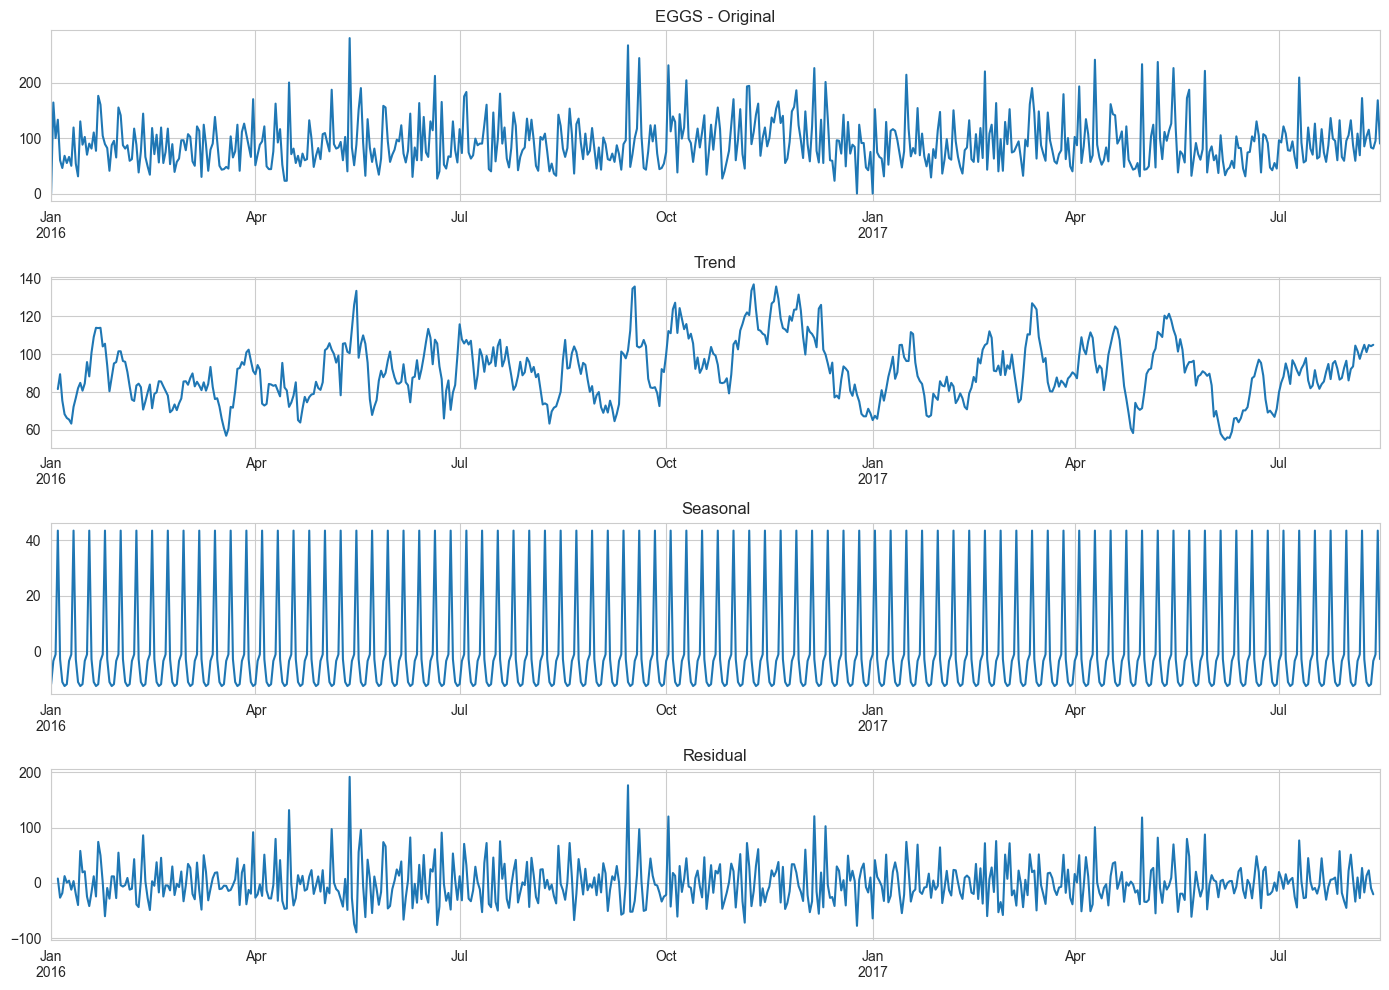

In [29]:
# Visualize decomposition for Product 1
if decomposition1 is not None:
    fig, axes = plt.subplots(4, 1, figsize=(14, 10))
    
    # TODO: Plot each component
    decomposition1.observed.plot(ax=axes[0], title=f'{product_family_1} - Original')
    decomposition1.trend.plot(ax=axes[1], title='Trend')
    decomposition1.seasonal.plot(ax=axes[2], title='Seasonal')
    decomposition1.resid.plot(ax=axes[3], title='Residual')
    
    plt.tight_layout()
    plt.show()

### Build Forecasts
Create a baseline forecast using the average of the last 30 days and a season naive forcast by repeating the last 7 days' pattern.

In [30]:
# Split data for validation
test_days = 30
train = product1_ts[:-test_days]
test = product1_ts[-test_days:]

# Method 1: Baseline forecast (30-day average)
baseline_forecast = np.repeat(train[-30:].mean(), test_days)

# Method 2: Seasonal Naive
# Just repeat the last 7 days pattern
last_week = train[-7:].values
seasonal_naive_forecast = np.tile(last_week, int(np.ceil(test_days/7)))[:test_days]

### Calculate Forecast Accuracy

In [32]:
# Calculate RMSE for both methods
# TODO: Calculate RMSE for baseline and seasonal forecasts

# Product 1
baseline_rmse = np.sqrt(mean_squared_error(test, baseline_forecast))
seasonal_rmse = np.sqrt(mean_squared_error(test, seasonal_naive_forecast))

In [ ]:
# Create comparison table
comparison_data = {
    'Method': ['30-Day Average', 'Seasonal Naive (7-day repeat)'],
    'RMSE': [baseline_rmse, seasonal_rmse],
}

comparison_df = pd.DataFrame(comparison_data)


# TODO: Calculate percentage improvement
# Add improvement column to comparison_df
comparison_df['Improvement'] = (baseline_rmse - seasonal_rmse) / baseline_rmse * 100



print("\n" + "="*80)
print("FORECAST PERFORMANCE COMPARISON")
print("="*80)
print(comparison_df)




print("="*80)


FORECAST PERFORMANCE COMPARISON
                          Method       RMSE  Improvement
0                 30-Day Average  31.975008   -34.889128
1  Seasonal Naive (7-day repeat)  43.130809   -34.889128


### Visualize Forecasts

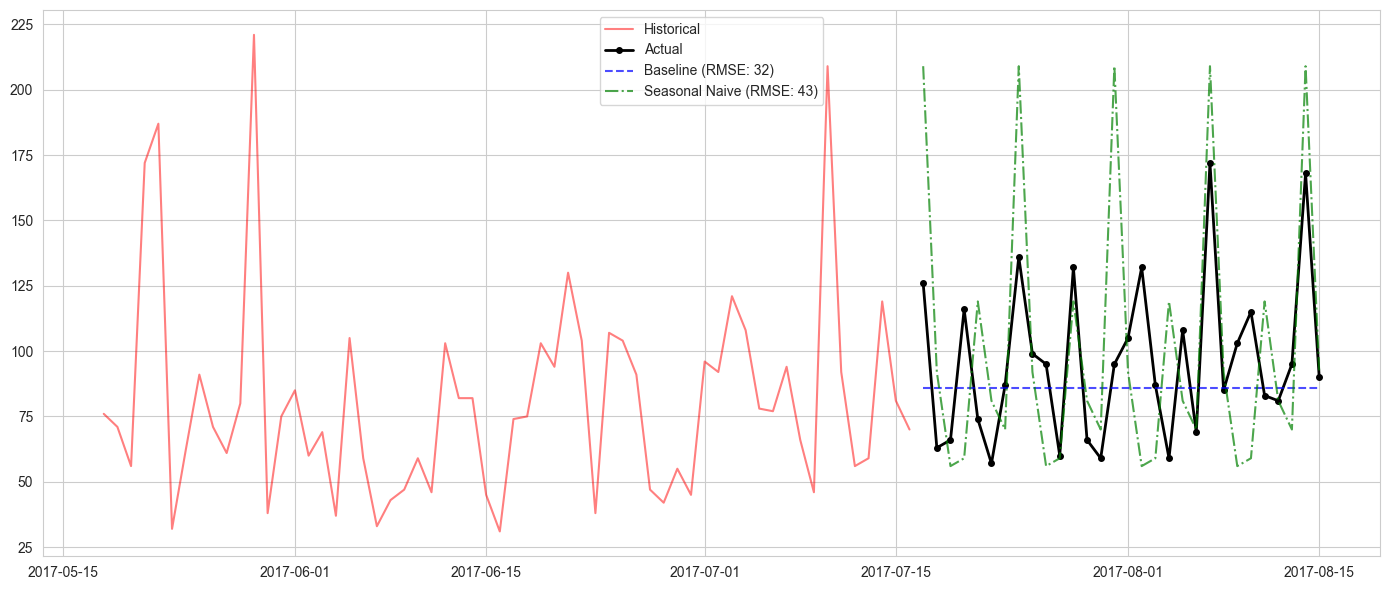

In [38]:
# Plot actual vs forecasted values
# TODO: Create visualization showing:
# - Historical data (last 60 days of train)
# - Actual test data
# - Baseline forecast
# - Seasonal naive forecast

plt.figure(figsize=(14, 6))

plt.plot(train.index[-60:], train.values[-60:], 
         label='Historical', color='red', alpha=0.5)

plt.plot(test.index, test.values, 
         label='Actual', color='black', linewidth=2, marker='o', markersize=4)

plt.plot(test.index, baseline_forecast, 
         label=f'Baseline (RMSE: {baseline_rmse:.0f})', 
         linestyle='--', color='blue', alpha=0.7)

plt.plot(test.index, seasonal_naive_forecast, 
         label=f'Seasonal Naive (RMSE: {seasonal_rmse:.0f})', 
         linestyle='-.', color='green', alpha=0.7)



# TODO: Plot on this single figure

plt.legend(loc='best')

plt.tight_layout()
plt.show()

---
## Step 6: Generate Business Recommendations

### Executive Summary (200-300 words)

Based on your analysis, write a brief executive summary that includes:
- **Key Patterns Discovered:** Summarize the main trends and seasonal patterns for each product
- **Inventory Planning Recommendations:** Specific recommendations based on your findings
- **High-Risk Periods:** Identify periods requiring special attention
- **Predictability Analysis:** Which product is more predictable and why?
- **Specific Action Item:** One concrete action the store manager should take based on your forecast

For the most part, egg sales remain relatively stable, with little month to month or week to week variation. Where more attention should be placed is on the day to day. Each week, egg sales increase on Mondays because of this. Therefore, store management should get into the habit of having eggs restocked before the store opens on Mondays. Additionally, there are days when egg sales spike exponentially. It's possible that these spikes are due to holidays, during which special dishes that require eggs are made. Identifying these holidays and preparing a larger shipment of eggs for these days should become a priority for store management.

---
## Step 7: Submit Your Work

Before submitting:
1. Ensure all code cells run without errors
2. Verify all visualizations display correctly
3. Check that your analysis sections are complete
4. Review your executive summary

Push to GitHub:
```bash
git add .
git commit -m 'completed time series forecasting assignment'
git push
```

Submit your GitHub repository link on the course platform.